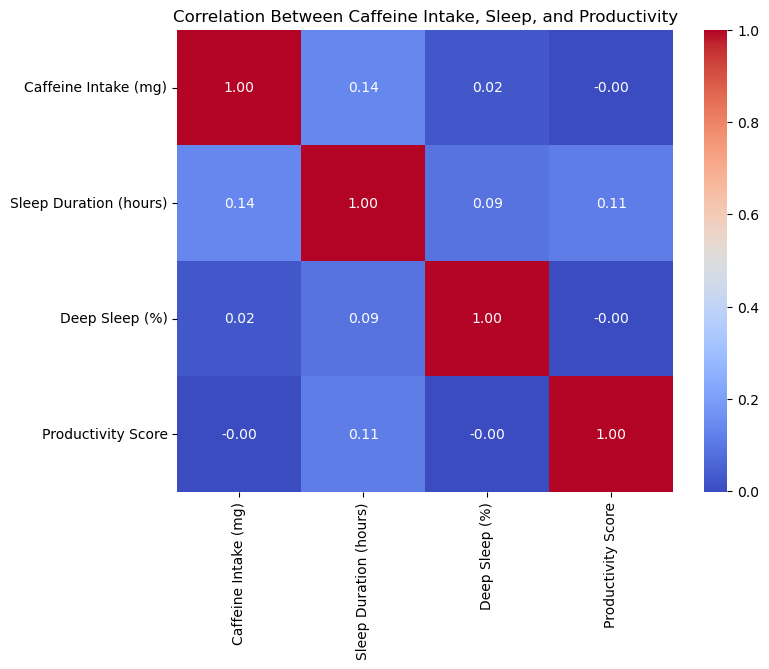

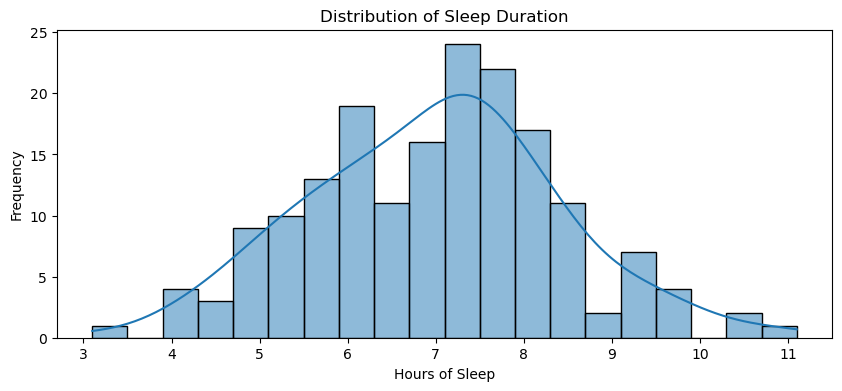

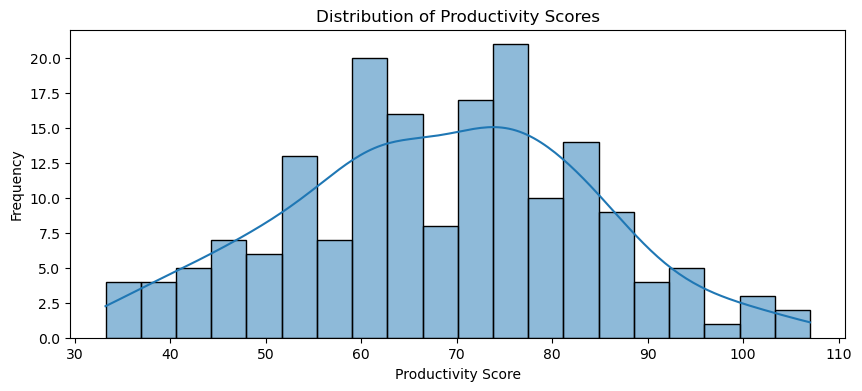

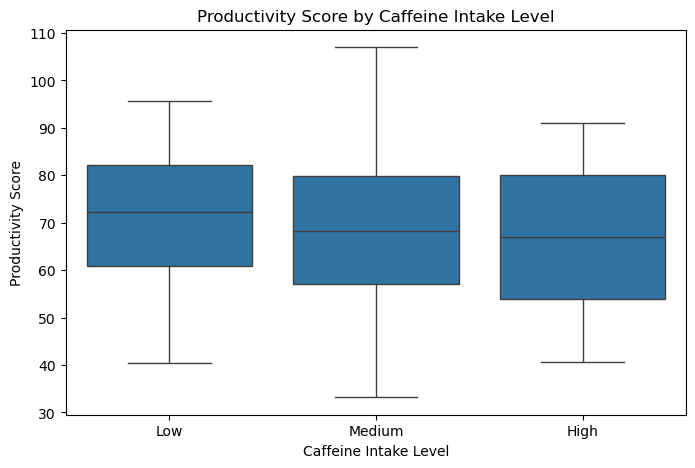

       Sleep Duration (hours)  Deep Sleep (%)  Night Awakenings  \
count              176.000000      176.000000        176.000000   
mean                 6.980682       20.405682          1.965909   
std                  1.421055        5.022563          1.413800   
min                  3.100000        3.800000          0.000000   
25%                  6.000000       16.700000          1.000000   
50%                  7.100000       20.350000          2.000000   
75%                  7.825000       23.825000          3.000000   
max                 11.100000       39.300000          4.000000   

       Sleep Consistency (days/week)  Caffeine Intake (mg)  \
count                     176.000000            143.000000   
mean                        4.494318             96.853147   
std                         1.126294             71.260478   
min                         3.000000              0.000000   
25%                         3.000000             50.000000   
50%                     

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset & 
CSV_file = "synthetic_sleep_productivity.csv"
df = pd.read_csv(CSV_file)

# Data Cleaning & Handling missing values
df.replace("unknown", np.nan, inplace=True)
df.dropna(subset=["Sleep Duration (hours)", "Deep Sleep (%)"], inplace=True)
df["Caffeine Intake (mg)"] = df["Caffeine Intake (mg)"].replace(-999, np.nan)

# Convert Deep Sleep to numeric
df["Deep Sleep (%)"] = pd.to_numeric(df["Deep Sleep (%)"], errors='coerce')

# Exploratory Data Analysis (EDA)
# Correlation analysis
correlation_matrix = df[["Caffeine Intake (mg)", "Sleep Duration (hours)", "Deep Sleep (%)", "Productivity Score"]].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Caffeine Intake, Sleep, and Productivity")
plt.show()

# Distribution plots
plt.figure(figsize=(10, 4))
sns.histplot(df["Sleep Duration (hours)"], bins=20, kde=True)
plt.title("Distribution of Sleep Duration")
plt.xlabel("Hours of Sleep")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df["Productivity Score"], bins=20, kde=True)
plt.title("Distribution of Productivity Scores")
plt.xlabel("Productivity Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot of productivity across caffeine intake levels
df["Caffeine Intake Category"] = pd.cut(df["Caffeine Intake (mg)"], bins=[0, 50, 150, 300], labels=["Low", "Medium", "High"])
plt.figure(figsize=(8, 5))
sns.boxplot(x="Caffeine Intake Category", y="Productivity Score", data=df)
plt.title("Productivity Score by Caffeine Intake Level")
plt.xlabel("Caffeine Intake Level")
plt.ylabel("Productivity Score")
plt.show()

# Summary statistics
print(df.describe())

# load and clean data
# df = preprocess_data("synthetic_sleep_productivity.csv")

# # Feature Engineering
# df = create_features(df)

# # Train ML models
# model = train_model(df, target="Productivity Score")

# # Evaluate and visualize results
# evaluate_model(model, df)
# visualize_correlations(df)